In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML

css_table = open('style-table.css').read()
css_notebook = open('style-notebook.css').read()
css_combined = css_table + css_notebook
HTML(f'<style>{css_combined}</style>')

In [3]:
import pandas as pd
file_path = r'D:\Practise exercise\python S1\titles.csv'
titles = pd.read_csv(file_path)
titles.head()

,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008


In [4]:
cast = pd.read_csv('D:\\Practise exercise\\python S1\\cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


# Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?


In [5]:
superman_batman_df = cast[(cast['character'] == 'Superman') | (cast['character'] == 'Batman')]
character_counts = superman_batman_df.groupby(['year', 'character']).size().unstack(fill_value=0)
superman_years = character_counts[character_counts['Superman'] > character_counts['Batman']]
count_superman_years = len(superman_years)
print(f'Number of "Superman years" in film history: {count_superman_years}')


Number of "Superman years" in film history: 11


# how many  years have been "Batman years" with more Batman characters than Superman characters:


In [6]:
superman_batman_df = cast[(cast['character'] == 'Superman') | (cast['character'] == 'Batman')]
character_counts = superman_batman_df.groupby(['year', 'character']).size().unstack(fill_value=0)
batman_years = character_counts[character_counts['Batman'] > character_counts['Superman']]
count_batman_years = len(batman_years)
print(f'Number of "Batman years" with more Batman characters than Superman characters: {count_batman_years}')


Number of "Batman years" with more Batman characters than Superman characters: 27


# Plot the number of actor and actress roles each year:


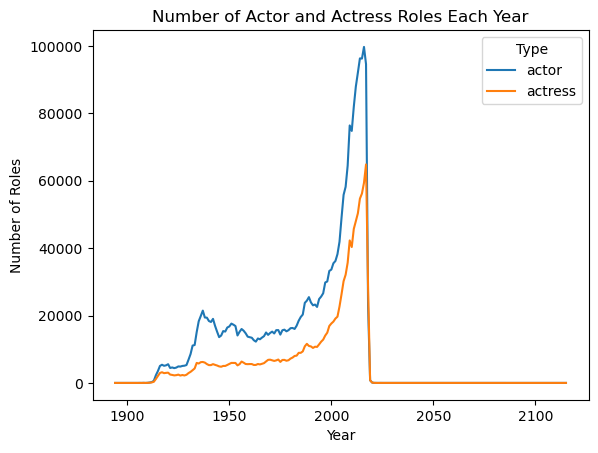

In [7]:
import matplotlib.pyplot as plt
actor_actress_df = cast[(cast['type'] == 'actor') | (cast['type'] == 'actress')]
roles_by_year = actor_actress_df.groupby(['year', 'type']).size().unstack(fill_value=0)
roles_by_year.plot(kind='line', title='Number of Actor and Actress Roles Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.legend(title='Type')
plt.show()


# Plot the number of actor and actress roles each year as an 'area' plot:


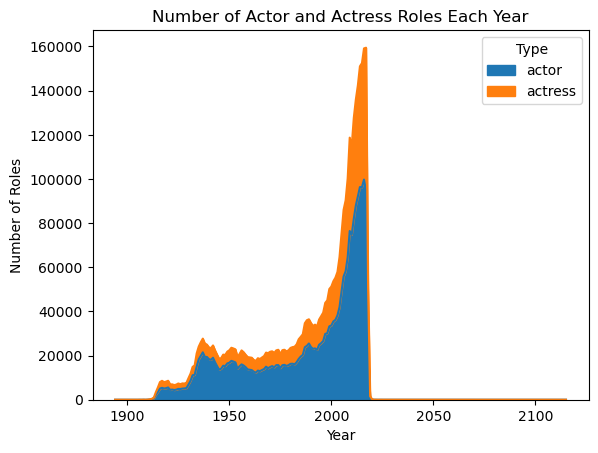

In [8]:
roles_by_year.plot(kind='area', title='Number of Actor and Actress Roles Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.legend(title='Type')
plt.show()


# Plot the difference between the number of actor and actress roles each year:


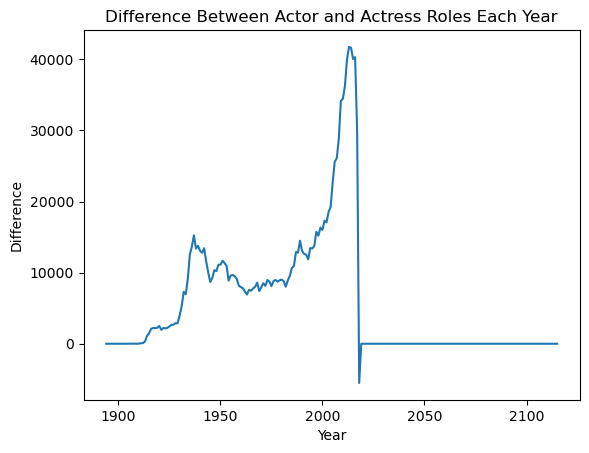

In [9]:
roles_difference = roles_by_year['actor'] - roles_by_year['actress']

roles_difference.plot(kind='line', title='Difference Between Actor and Actress Roles Each Year')
plt.xlabel('Year')
plt.ylabel('Difference')
plt.show()


# Plot the fraction of roles that have been 'actor' roles each year:


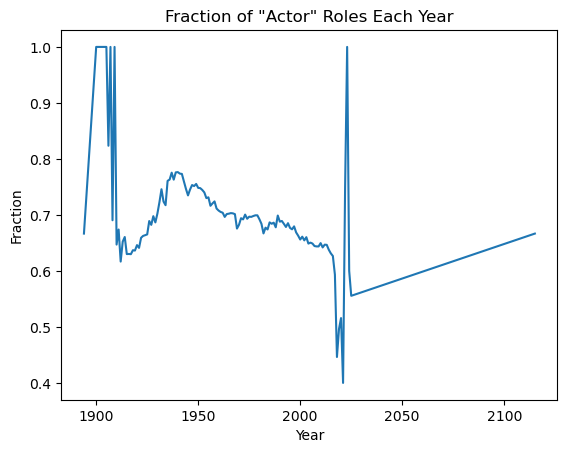

In [10]:
total_roles_by_year = roles_by_year['actor'] + roles_by_year['actress']
actor_fraction = roles_by_year['actor'] / total_roles_by_year
actor_fraction.plot(kind='line', title='Fraction of "Actor" Roles Each Year')
plt.xlabel('Year')
plt.ylabel('Fraction')
plt.show()
